**Toxic comment classification - Data Debias and Reprocessing (2)**

- Examining potential bias
- Data reprocessing

In [1]:
import pandas as pd
import collections
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import ast
import itertools

<div style="border-top: 7px solid #800080; animation: sparkling 2s linear infinite;"></div>

<style>
@keyframes sparkling {
  0% { background-position: 0 0; }
  100% { background-position: 100% 0; }
}
</style>

**1. Examining Bias**

- Examining potential bias against a particular group, gender, ethnicity etc.

In [2]:
train_df = pd.read_csv('processed_train_data.csv')

In [3]:
# Load the language model
nlp = spacy.load("en_core_web_lg")

In [4]:
# Convert string representations of lists back to lists
train_df["lemmas"] = train_df["lemmas"].apply(ast.literal_eval)
# Flatten the list of lists
flat_lemmas = list(itertools.chain.from_iterable(train_df["lemmas"]))

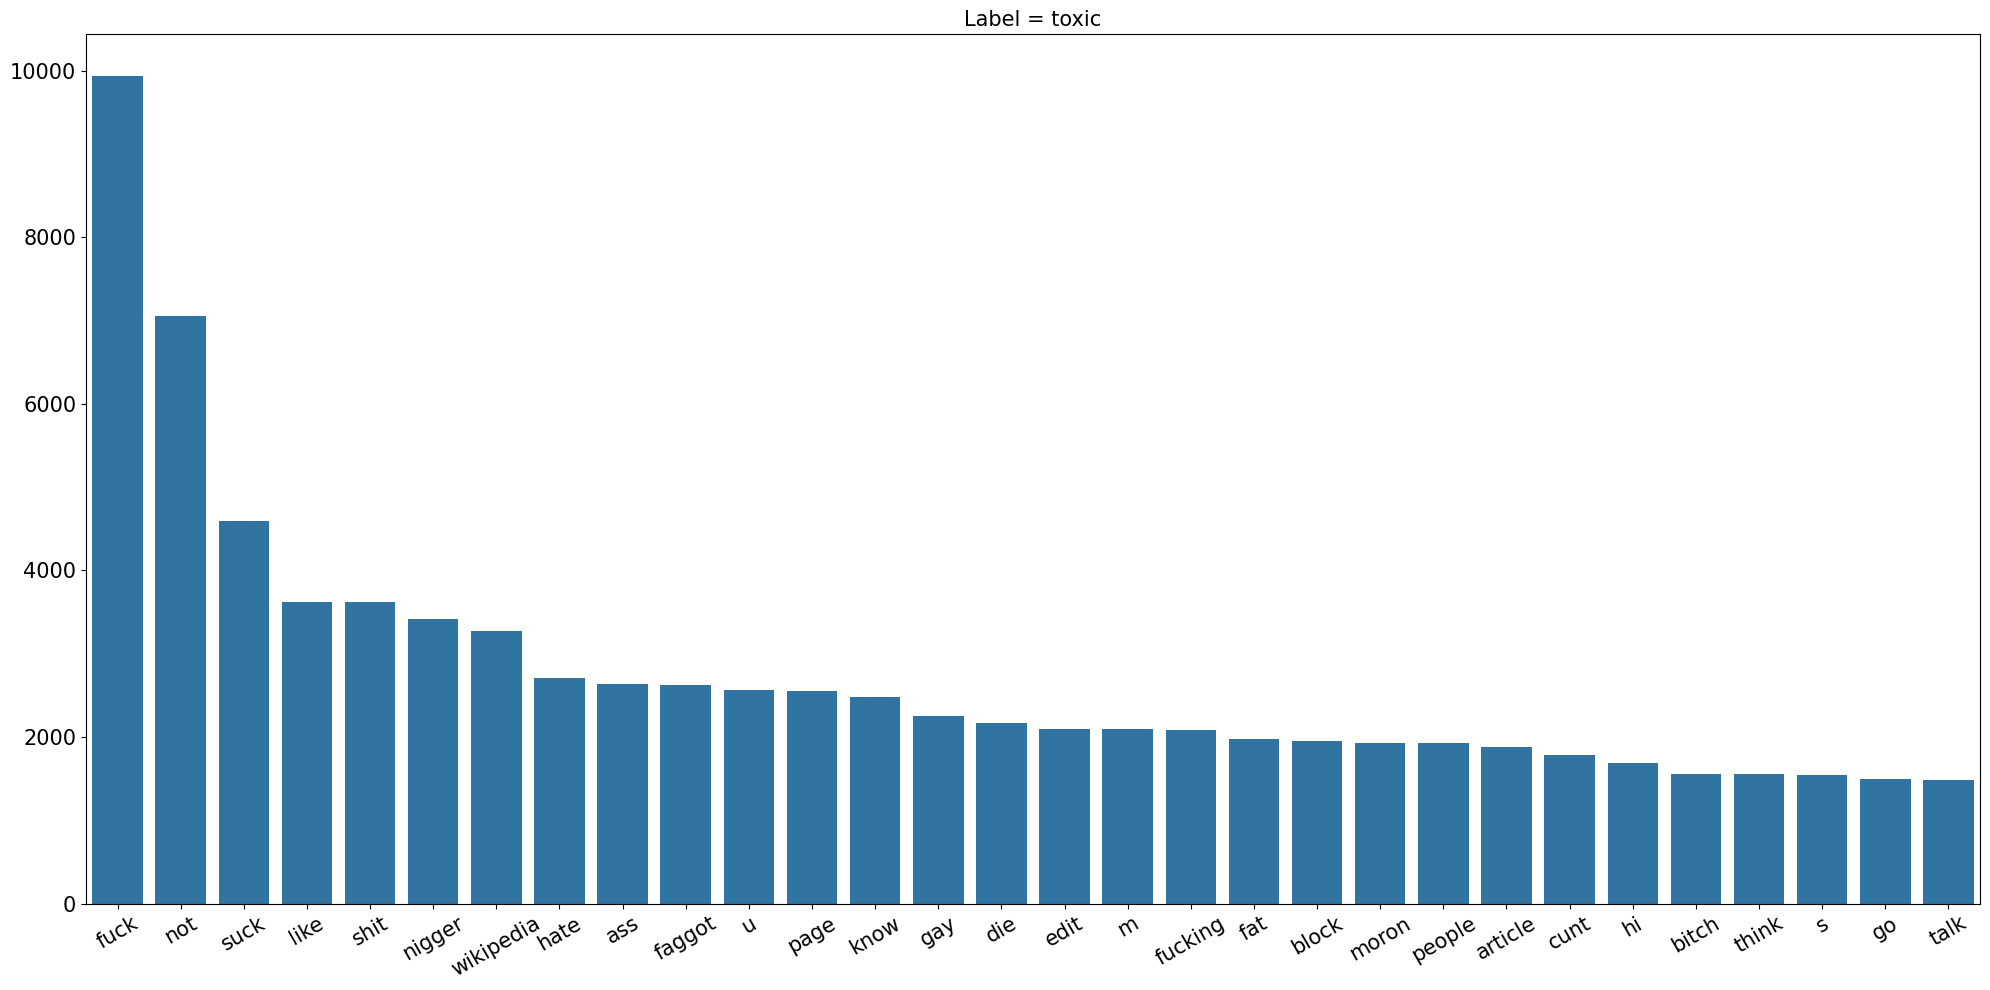

Most common words in toxic class: [('fuck', 9941), ('not', 7056), ('suck', 4595), ('like', 3625), ('shit', 3615), ('nigger', 3416), ('wikipedia', 3276), ('hate', 2706), ('ass', 2631), ('faggot', 2630), ('u', 2565), ('page', 2558), ('know', 2475), ('gay', 2251), ('die', 2169), ('edit', 2091), ('m', 2090), ('fucking', 2084), ('fat', 1971), ('block', 1949), ('moron', 1932), ('people', 1927), ('article', 1875), ('cunt', 1785), ('hi', 1689), ('bitch', 1554), ('think', 1553), ('s', 1546), ('go', 1497), ('talk', 1478)]


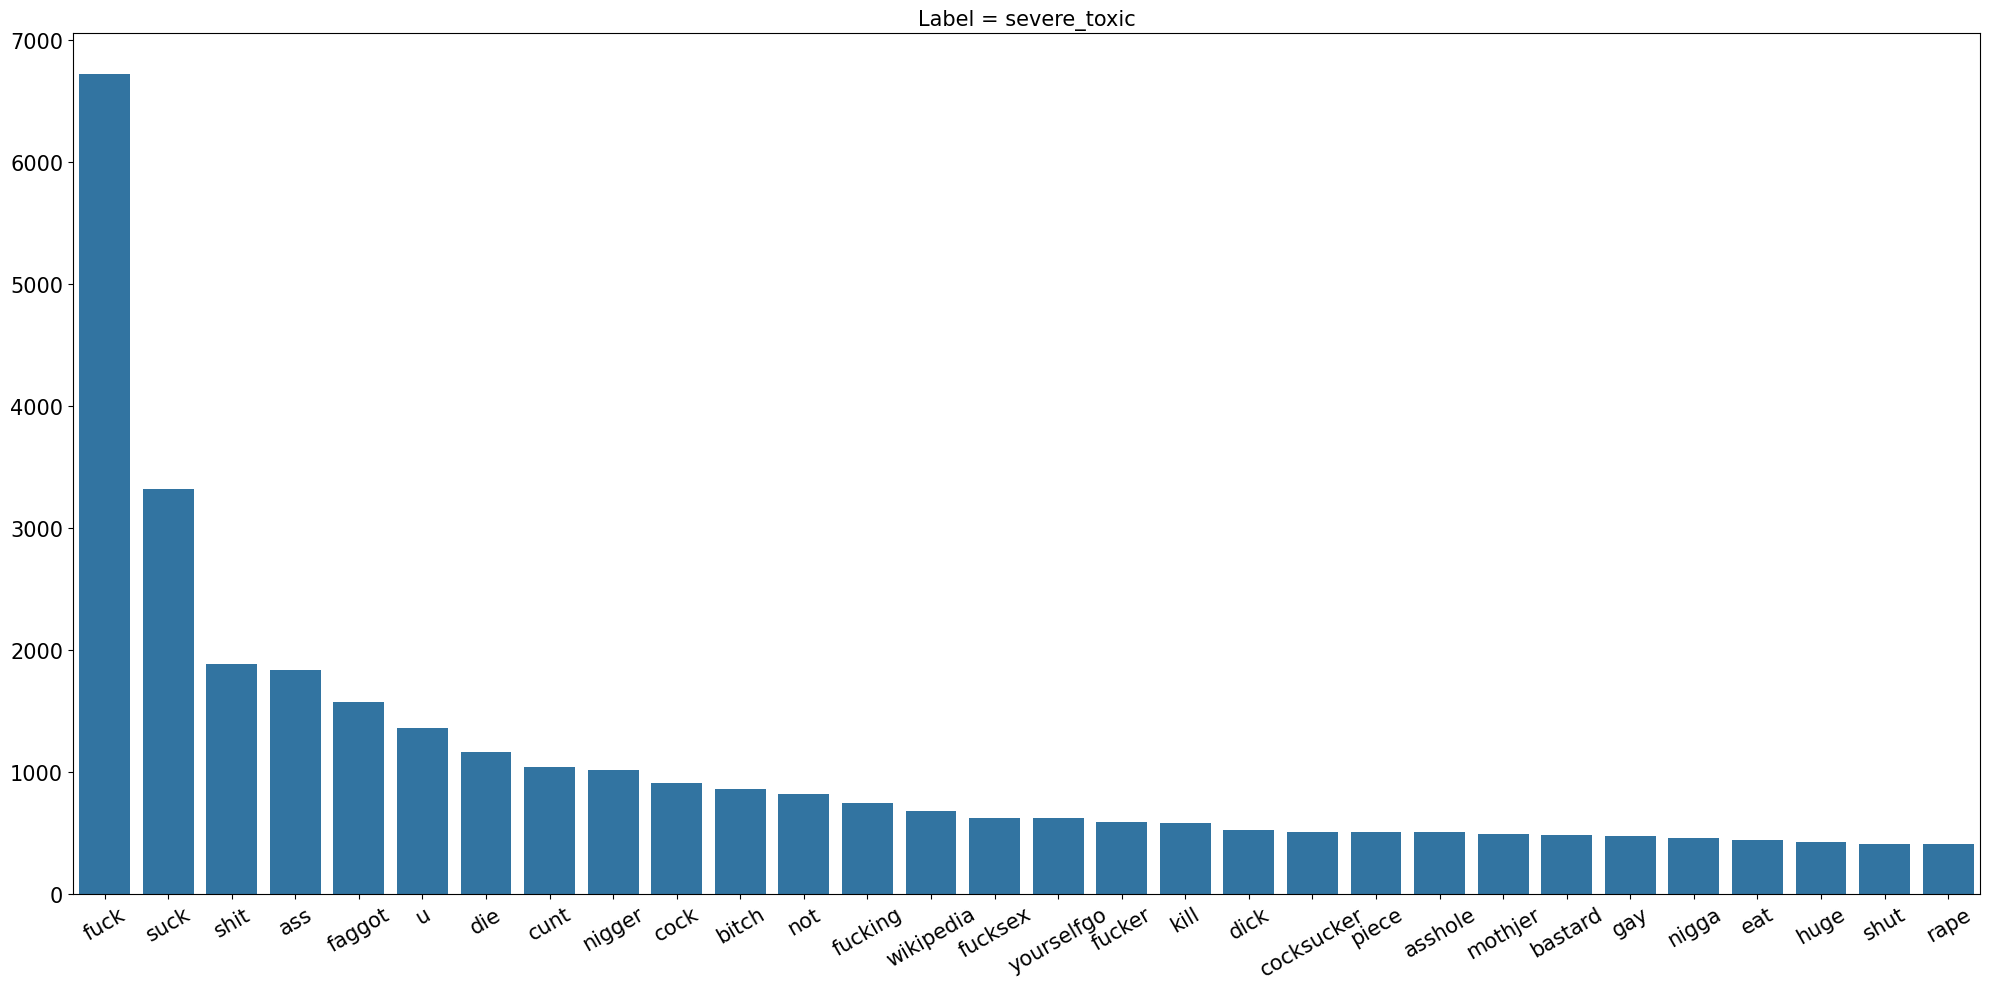

Most common words in severe_toxic class: [('fuck', 6720), ('suck', 3324), ('shit', 1882), ('ass', 1833), ('faggot', 1575), ('u', 1364), ('die', 1164), ('cunt', 1037), ('nigger', 1018), ('cock', 911), ('bitch', 861), ('not', 819), ('fucking', 747), ('wikipedia', 681), ('fucksex', 624), ('yourselfgo', 621), ('fucker', 590), ('kill', 585), ('dick', 522), ('cocksucker', 509), ('piece', 508), ('asshole', 506), ('mothjer', 489), ('bastard', 485), ('gay', 479), ('nigga', 462), ('eat', 441), ('huge', 424), ('shut', 407), ('rape', 407)]


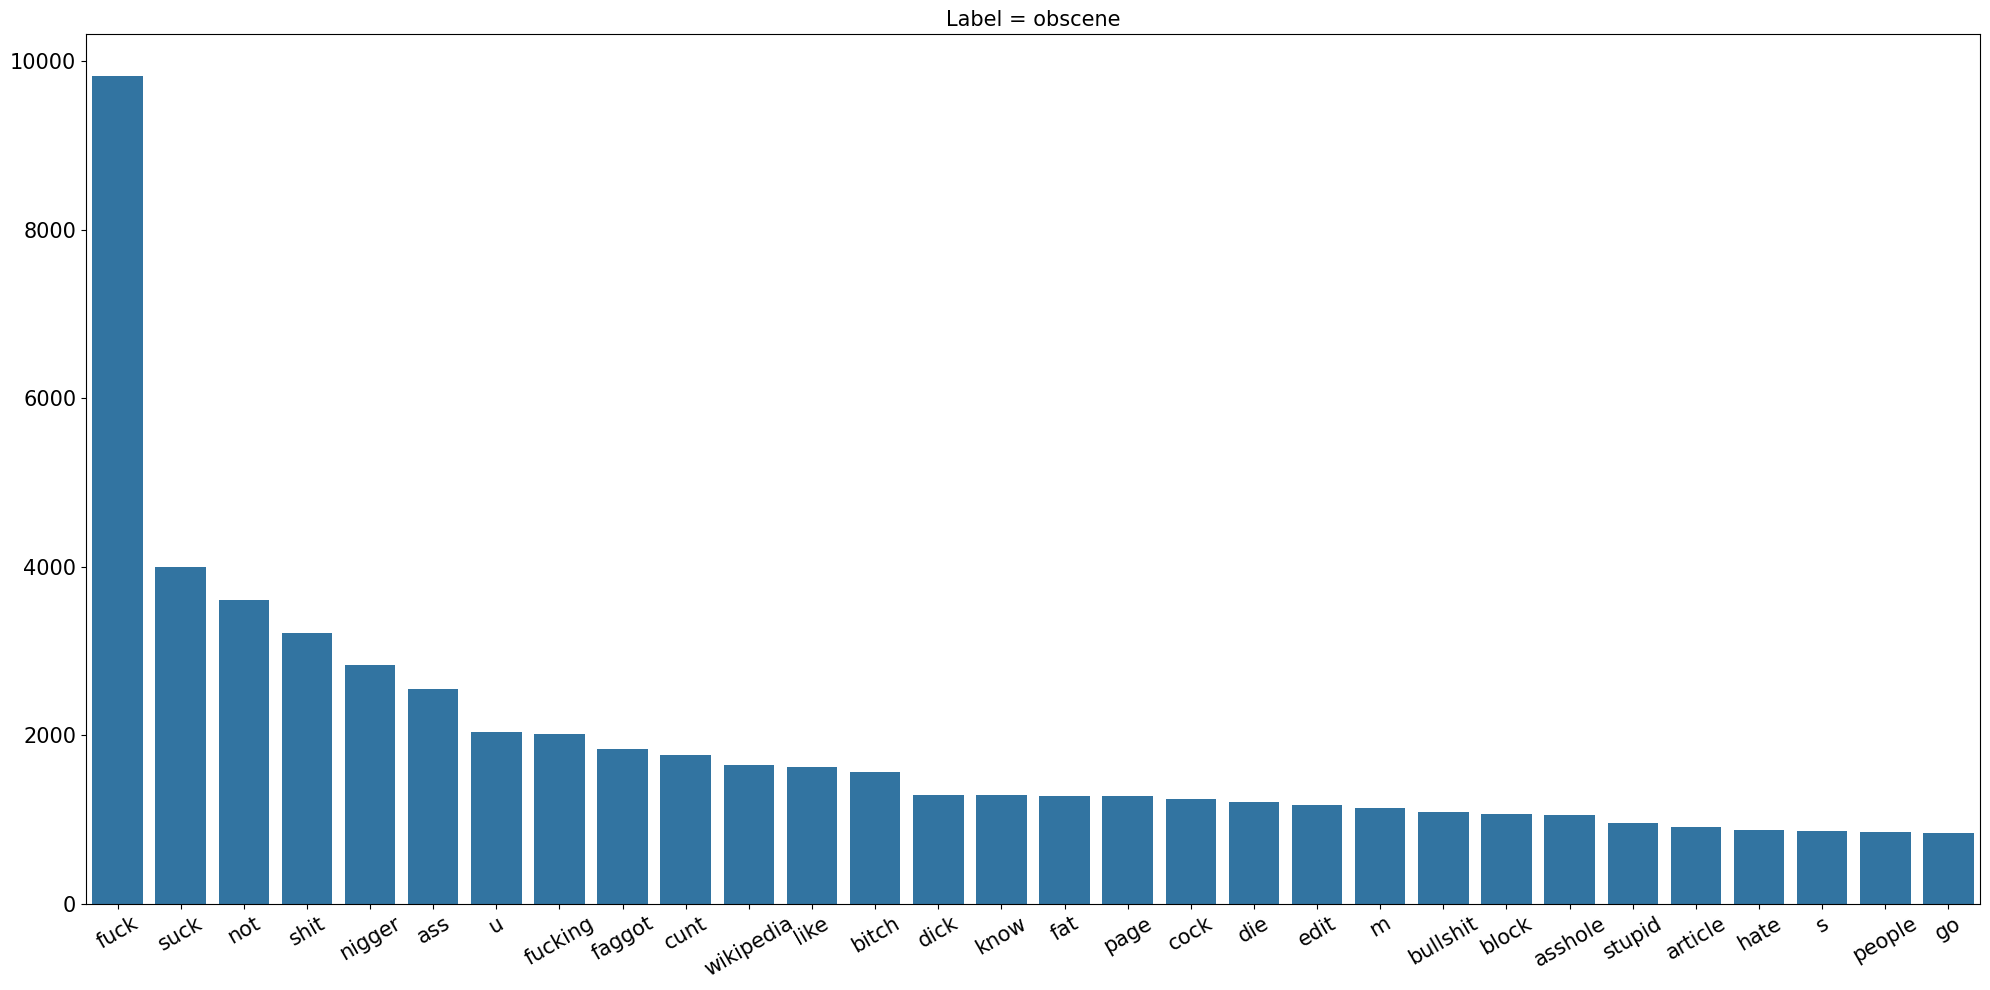

Most common words in obscene class: [('fuck', 9826), ('suck', 3990), ('not', 3597), ('shit', 3208), ('nigger', 2831), ('ass', 2546), ('u', 2036), ('fucking', 2011), ('faggot', 1834), ('cunt', 1768), ('wikipedia', 1643), ('like', 1624), ('bitch', 1556), ('dick', 1293), ('know', 1293), ('fat', 1282), ('page', 1280), ('cock', 1245), ('die', 1210), ('edit', 1175), ('m', 1138), ('bullshit', 1088), ('block', 1066), ('asshole', 1049), ('stupid', 954), ('article', 911), ('hate', 870), ('s', 861), ('people', 847), ('go', 843)]


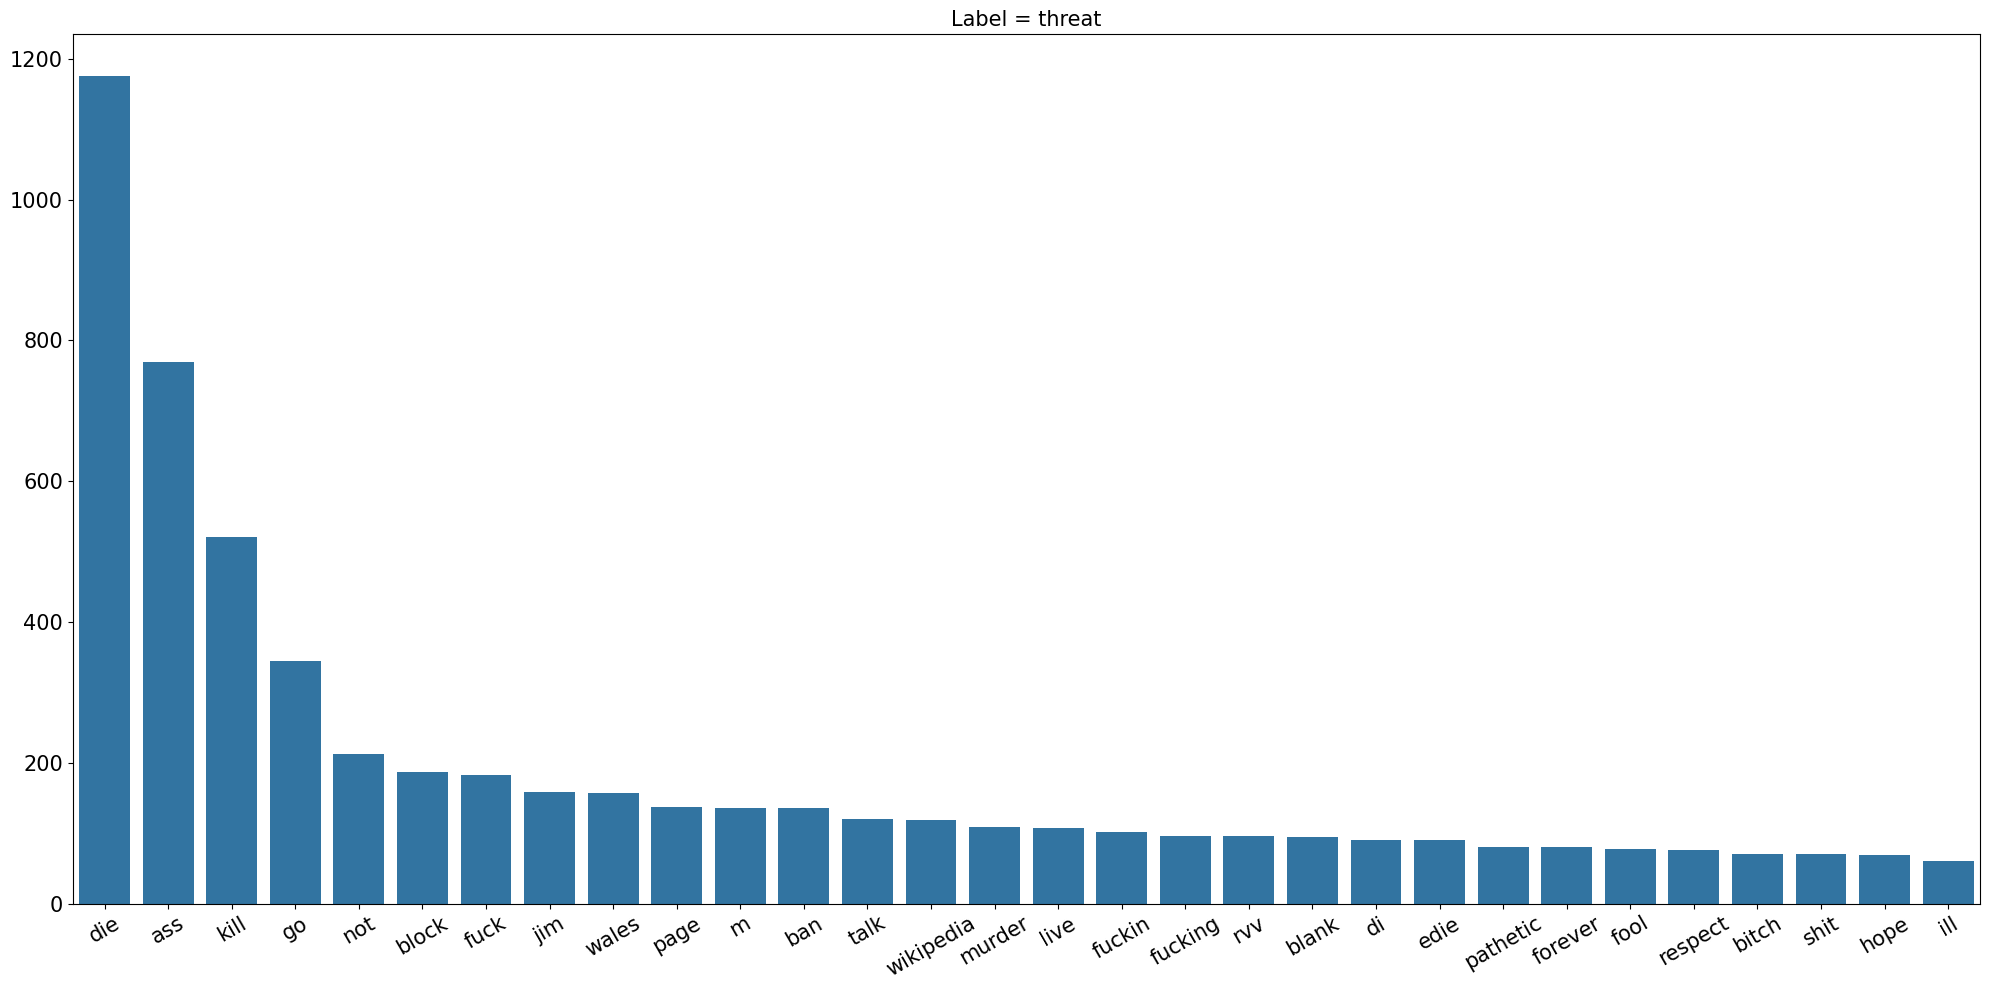

Most common words in threat class: [('die', 1176), ('ass', 769), ('kill', 521), ('go', 345), ('not', 213), ('block', 187), ('fuck', 182), ('jim', 158), ('wales', 157), ('page', 137), ('m', 136), ('ban', 136), ('talk', 120), ('wikipedia', 118), ('murder', 109), ('live', 107), ('fuckin', 101), ('fucking', 96), ('rvv', 96), ('blank', 94), ('di', 90), ('edie', 90), ('pathetic', 81), ('forever', 80), ('fool', 77), ('respect', 76), ('bitch', 71), ('shit', 70), ('hope', 69), ('ill', 60)]


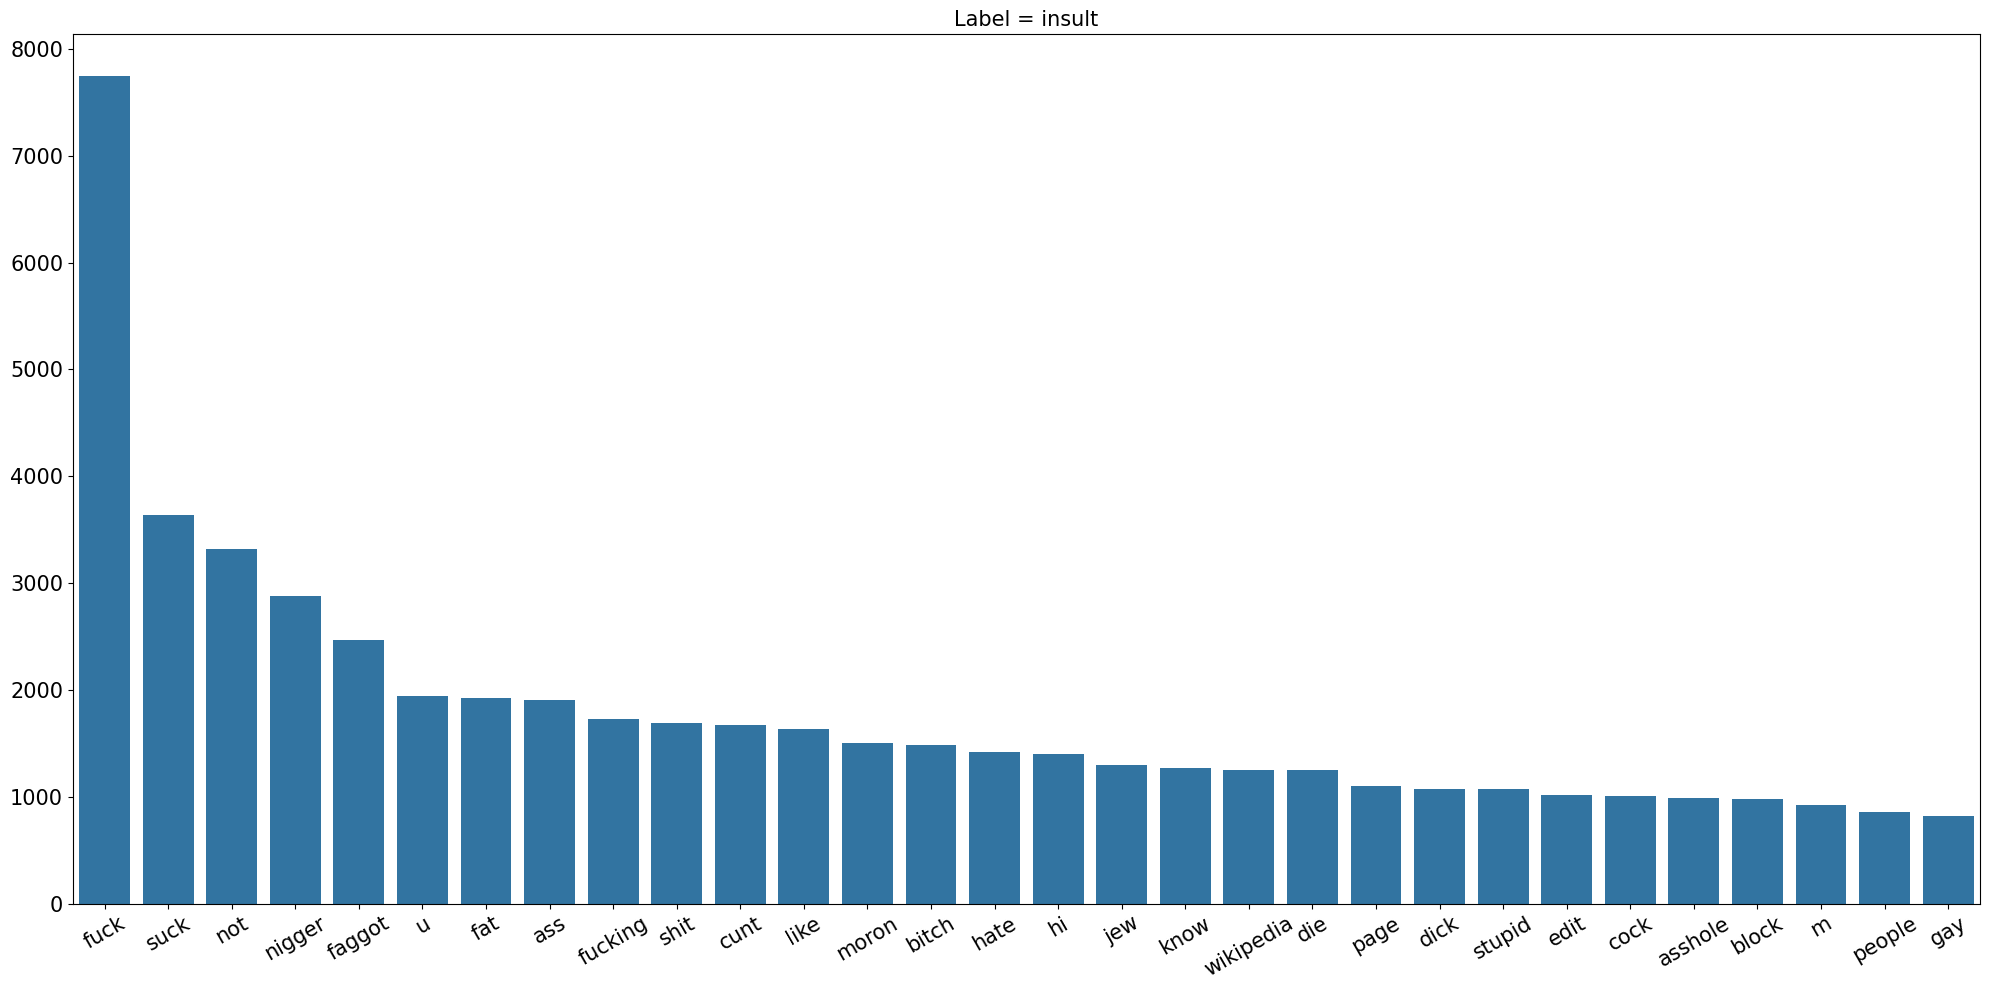

Most common words in insult class: [('fuck', 7749), ('suck', 3636), ('not', 3319), ('nigger', 2882), ('faggot', 2470), ('u', 1943), ('fat', 1926), ('ass', 1906), ('fucking', 1725), ('shit', 1686), ('cunt', 1674), ('like', 1631), ('moron', 1507), ('bitch', 1486), ('hate', 1420), ('hi', 1399), ('jew', 1301), ('know', 1273), ('wikipedia', 1254), ('die', 1254), ('page', 1102), ('dick', 1073), ('stupid', 1070), ('edit', 1018), ('cock', 1005), ('asshole', 988), ('block', 976), ('m', 925), ('people', 856), ('gay', 821)]


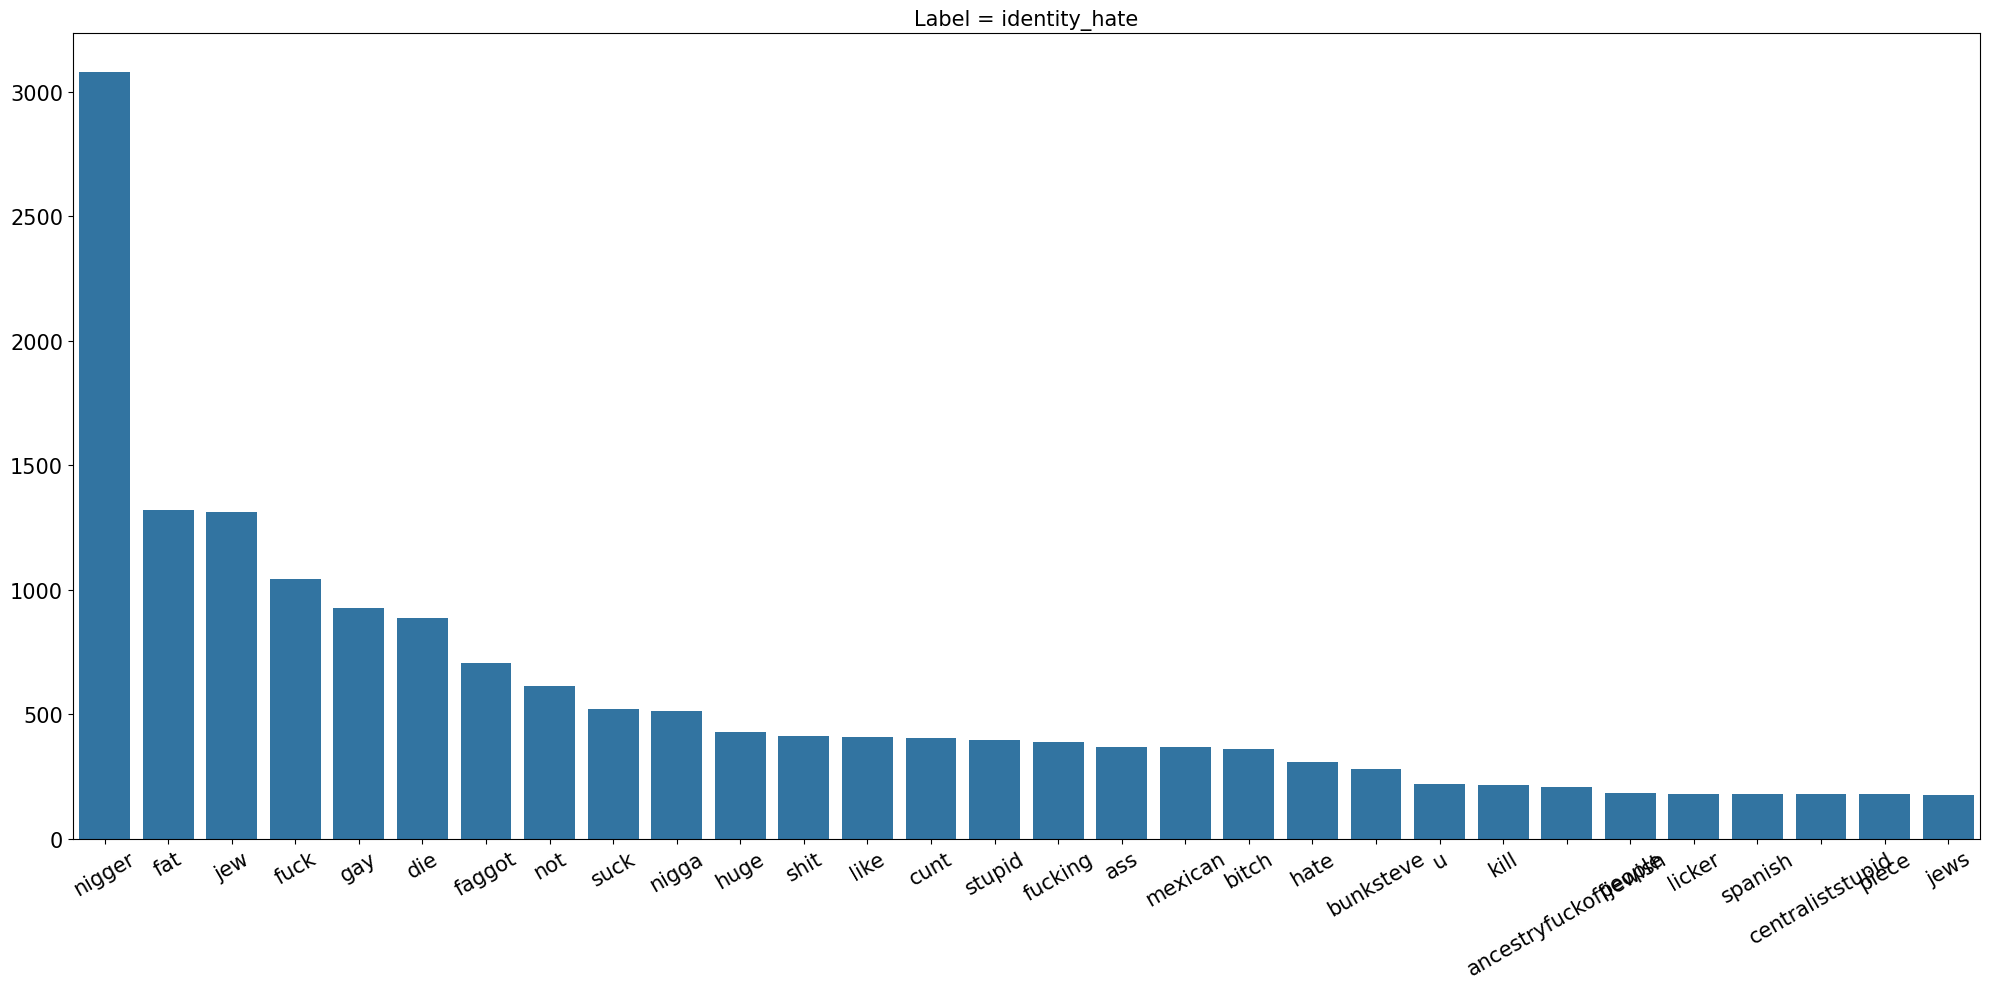

Most common words in identity_hate class: [('nigger', 3081), ('fat', 1322), ('jew', 1313), ('fuck', 1042), ('gay', 927), ('die', 885), ('faggot', 705), ('not', 615), ('suck', 522), ('nigga', 512), ('huge', 429), ('shit', 412), ('like', 407), ('cunt', 403), ('stupid', 395), ('fucking', 387), ('ass', 369), ('mexican', 369), ('bitch', 358), ('hate', 309), ('bunksteve', 278), ('u', 218), ('kill', 215), ('ancestryfuckoffjewish', 207), ('people', 183), ('licker', 181), ('spanish', 181), ('centraliststupid', 179), ('piece', 178), ('jews', 177)]


In [5]:
# Examining the most common lemmas for each class in details
target_classes = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
for label in target_classes:
    word_list = list(train_df.loc[train_df[label]==1, 'lemmas'].explode())
    most_common = collections.Counter(word_list).most_common(30)
    words = [w for w,_ in most_common]
    counts = [c for _,c in most_common]
    plt.figure(figsize=(20, 10))
    ax = sns.barplot(x=words, y=counts)
    ax.set_title(f'Label = {label}', fontsize=15)
    ax.tick_params(labelsize=15)
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
    plt.tight_layout() 
    plt.show()
    print(f'Most common words in {label} class: {most_common}')

In [6]:
# Examining the most common NER
# Filter the DataFrame to include only toxic classes for the target classes
positive_cases_df = train_df[train_df[target_classes].any(axis=1)]

In [13]:
merged_text = ' '.join(positive_cases_df['token_nonstop'])

# Calculate the length of each piece
piece_length = len(merged_text) // 10

# Initialize a list to store the split pieces of text
split_texts = []

# Split the merged text into 10 pieces, because the data is too big
for i in range(10):
    start_index = i * piece_length
    end_index = (i + 1) * piece_length if i < 9 else None  
    piece = merged_text[start_index:end_index]
    split_texts.append(piece)

# Apply NER on each piece of text
for i, piece in enumerate(split_texts):
    doc = nlp(piece)
    named_entities = [(ent.text, ent.label_) for ent in doc.ents]
    
    # Print or further process the named entities and their labels for the current piece
    print(f"Named entities for Piece {i+1}:")
    for entity, label in named_entities:
        print(f"- Entity: {entity}, Label: {label}")
    print() 

Named entities for Piece 1:
- Entity: wwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwww

Named entities for Piece 2:
- Entity: 'fred', Label: PERSON
- Entity: cocklskew, Label: ORG
- Entity: richard', Label: PERSON
- Entity: liszts, Label: PERSON
- Entity: hungarian, Label: NORP
- Entity: richard', Label: PERSON
- Entity: richard', Label: PERSON
- Entity: liszts, Label: PERSON
- Entity: hungarian, Label: NORP
- Entity: hungarian, Label: NORP
- Entity: macedonian, Label: ORG
- Entity: macedonian, Label: ORG
- Entity: second, Label: ORDINAL
- Entity: nazi, Label: NORP
- Entity: 'year', Label: DATE
- Entity: 'year', Label: DATE
- Entity: arbcom, Label: ORG
- Entity: wales', Label: ORG
- Entity: arbcom, Label: ORG
- Entity: kaine, Label: PERSON
- Entity: ani, Label: PERSON
- Entity: donna, Label: PERSON
- Entity: roger', Label: PERSON
- Entity: gaba, Label: PERSON
- Entity: john, Label: PERSON
- Entity: mccain, Label: PERSON
- Entity: america, Label: GPE
- Entity: emotinoal, Label: ORG
- Entity: makingme', Label: ORG
- Entity: nazi, Label: NORP
- Entity: nazi, Label: NORP
- En

Named entities for Piece 3:
- Entity: 'kent', Label: PERSON
- Entity: 'christmas', Label: DATE
- Entity: harvard, Label: ORG
- Entity: elizabeth, Label: PERSON
- Entity: wales', Label: ORG
- Entity: mexican, Label: NORP
- Entity: haiti, Label: GPE
- Entity: boothill, Label: PERSON
- Entity: kleargear', Label: ORG
- Entity: 'days', Label: DATE
- Entity: 'week', Label: DATE
- Entity: abot, Label: PERSON
- Entity: noah, Label: PERSON
- Entity: kennedy, Label: PERSON
- Entity: lincoln, Label: ORG
- Entity: margeret, Label: ORG
- Entity: castro, Label: PERSON
- Entity: castro, Label: PERSON
- Entity: europeans, Label: NORP
- Entity: delet, Label: PERSON
- Entity: europeans, Label: NORP
- Entity: radisson, Label: PERSON
- Entity: musicpvm, Label: ORG
- Entity: english, Label: NORP
- Entity: 'years', Label: DATE
- Entity: jett, Label: PERSON
- Entity: iran, Label: GPE
- Entity: nazi, Label: NORP
- Entity: soviet, Label: NORP
- Entity: second, Label: ORDINAL
- Entity: mexican, Label: NORP
- En

Named entities for Piece 4:
- Entity: 'months', Label: DATE
- Entity: 'years', Label: DATE
- Entity: australian, Label: NORP
- Entity: 'years', Label: DATE
- Entity: kno, Label: PERSON
- Entity: maself, Label: PERSON
- Entity: bettah, Label: ORG
- Entity: 'summer', Label: DATE
- Entity: niggggguuuuhhhh, Label: ORG
- Entity: sitush, Label: PERSON
- Entity: sudhra, Label: PERSON
- Entity: varna, Label: ORG
- Entity: khastriya', Label: PERSON
- Entity: varna, Label: ORG
- Entity: republican, Label: NORP
- Entity: democrats, Label: NORP
- Entity: goains, Label: PERSON
- Entity: 'years', Label: DATE
- Entity: mechanicus, Label: GPE
- Entity: fuc, Label: PERSON
- Entity: dale', Label: ORG
- Entity: fuc, Label: PERSON
- Entity: jill, Label: PERSON
- Entity: jill, Label: PERSON
- Entity: john, Label: PERSON
- Entity: canadian, Label: NORP
- Entity: aksai, Label: GPE
- Entity: chinese, Label: NORP
- Entity: john, Label: PERSON
- Entity: assaultin, Label: PERSON
- Entity: zimmmerman, Label: PERS

Named entities for Piece 5:
- Entity: ge, Label: ORG
- Entity: larry, Label: PERSON
- Entity: james', Label: PERSON
- Entity: 'years', Label: DATE
- Entity: joe, Label: PERSON
- Entity: 'months', Label: DATE
- Entity: 'weeks', Label: DATE
- Entity: 'year', Label: DATE
- Entity: boyz, Label: PERSON
- Entity: 'weeks', Label: DATE
- Entity: boyz, Label: PERSON
- Entity: 'weeks', Label: DATE
- Entity: 'weeks', Label: DATE
- Entity: macarena, Label: PERSON
- Entity: 'weeks', Label: DATE
- Entity: 'weeks', Label: DATE
- Entity: 'weeks', Label: DATE
- Entity: boyz, Label: PERSON
- Entity: 'weeks', Label: DATE
- Entity: 'weeks', Label: DATE
- Entity: santana, Label: GPE
- Entity: 'weeks', Label: DATE
- Entity: 'weeks', Label: DATE
- Entity: 'weeks', Label: DATE
- Entity: 'weeks', Label: DATE
- Entity: un, Label: ORG
- Entity: 'weeks', Label: DATE
- Entity: 'weeks', Label: DATE
- Entity: 'weeks', Label: DATE
- Entity: olivia, Label: GPE
- Entity: newton, Label: PERSON
- Entity: 'weeks', Label: 

Named entities for Piece 6:
- Entity: obama, Label: PERSON
- Entity: aclu, Label: ORG
- Entity: wikkkipedians, Label: NORP
- Entity: bieber, Label: PERSON
- Entity: israeli, Label: NORP
- Entity: israel, Label: GPE
- Entity: iran, Label: GPE
- Entity: israel, Label: GPE
- Entity: israel, Label: GPE
- Entity: israel, Label: GPE
- Entity: british, Label: NORP
- Entity: israelis, Label: NORP
- Entity: israel, Label: GPE
- Entity: british, Label: NORP
- Entity: israel, Label: GPE
- Entity: europeans, Label: NORP
- Entity: christians, Label: NORP
- Entity: muslims, Label: NORP
- Entity: jews, Label: NORP
- Entity: british, Label: NORP
- Entity: jews, Label: NORP
- Entity: israel, Label: GPE
- Entity: britain, Label: GPE
- Entity: british, Label: NORP
- Entity: germans, Label: NORP
- Entity: jews, Label: NORP
- Entity: israel, Label: GPE
- Entity: jews, Label: NORP
- Entity: israel, Label: GPE
- Entity: jews, Label: NORP
- Entity: israel, Label: GPE
- Entity: arabs, Label: NORP
- Entity: isr

Named entities for Piece 7:
- Entity: tonight, Label: TIME
- Entity: tonight, Label: TIME
- Entity: bush, Label: PERSON
- Entity: asskrack, Label: ORG
- Entity: john, Label: PERSON
- Entity: asskrack, Label: ORG
- Entity: nazi, Label: NORP
- Entity: english, Label: NORP
- Entity: english, Label: NORP
- Entity: english, Label: NORP
- Entity: english, Label: NORP
- Entity: soviet, Label: NORP
- Entity: russia, Label: GPE
- Entity: soviet, Label: NORP
- Entity: johnson, Label: PERSON
- Entity: mexican, Label: NORP
- Entity: bleckter, Label: PERSON
- Entity: bleckter, Label: PERSON
- Entity: bleckter, Label: PERSON
- Entity: bleckter, Label: PERSON
- Entity: mexican, Label: NORP
- Entity: mridul, Label: PERSON
- Entity: accusin, Label: ORG
- Entity: animalfucker, Label: PERSON
- Entity: tch, Label: ORG
- Entity: roger', Label: PERSON
- Entity: gaba, Label: PERSON
- Entity: mm, Label: PERSON
- Entity: muslim, Label: NORP
- Entity: muslims, Label: NORP
- Entity: pakistan, Label: GPE
- Entity

Named entities for Piece 8:
- Entity: 'virgin', Label: PERSON
- Entity: second, Label: ORDINAL
- Entity: nazi, Label: NORP
- Entity: bahahahahaha, Label: PERSON
- Entity: jews, Label: NORP
- Entity: panslavist, Label: PERSON
- Entity: idiote, Label: ORG
- Entity: panslavist, Label: PERSON
- Entity: slovakia, Label: GPE
- Entity: canadian, Label: NORP
- Entity: fashhion, Label: PERSON
- Entity: wolverhampton, Label: PERSON
- Entity: thompson', Label: ORG
- Entity: 'year', Label: DATE
- Entity: 'year', Label: DATE
- Entity: sam, Label: PERSON
- Entity: lolz, Label: PERSON
- Entity: woooooo', Label: ORG
- Entity: woooo, Label: ORG
- Entity: ann, Label: PERSON
- Entity: ann, Label: PERSON
- Entity: woooooooooooooooooooooooooooooooooooooooooooooooooo, Label: ORG
- Entity: ann, Label: PERSON
- Entity: ann, Label: PERSON
- Entity: ann, Label: PERSON
- Entity: ann, Label: PERSON
- Entity: ann, Label: PERSON
- Entity: pecie', Label: ORG
- Entity: ann, Label: PERSON
- Entity: goona', Label: ORG


Named entities for Piece 9:
- Entity: 'aquaman', Label: PERSON
- Entity: 'aquaman', Label: PERSON
- Entity: superfriends', Label: ORG
- Entity: cuntrag, Label: PERSON
- Entity: france, Label: GPE
- Entity: secondly, Label: ORDINAL
- Entity: purplewowies, Label: ORG
- Entity: zens', Label: ORG
- Entity: britannica', Label: ORG
- Entity: zens', Label: ORG
- Entity: zens', Label: ORG
- Entity: kramuc, Label: PERSON
- Entity: 'june', Label: DATE
- Entity: republicanjcobite, Label: PERSON
- Entity: americans, Label: NORP
- Entity: entern, Label: PERSON
- Entity: winkipedia, Label: PERSON
- Entity: robert', Label: PERSON
- Entity: muslim, Label: NORP
- Entity: muslim, Label: NORP
- Entity: bush, Label: PERSON
- Entity: muslim, Label: NORP
- Entity: vessle, Label: PERSON
- Entity: muslim, Label: NORP
- Entity: 'dublin', Label: PERSON
- Entity: 'george', Label: PERSON
- Entity: wales', Label: ORG
- Entity: wales', Label: ORG
- Entity: wikipedica, Label: ORG
- Entity: istead, Label: PERSON
- En

Named entities for Piece 10:
- Entity: neways, Label: ORG
- Entity: userboxes, Label: ORG
- Entity: devaraya, Label: PERSON
- Entity: dravidian, Label: ORG
- Entity: snott', Label: ORG
- Entity: jews, Label: NORP
- Entity: meg, Label: ORG
- Entity: 'days', Label: DATE
- Entity: monday, Label: DATE
- Entity: israel, Label: GPE
- Entity: 'years', Label: DATE
- Entity: muzikanimul', Label: ORG
- Entity: wales', Label: ORG
- Entity: moslem', Label: ORG
- Entity: lulzy, Label: PERSON
- Entity: john, Label: PERSON
- Entity: john, Label: PERSON
- Entity: ripleman, Label: PERSON
- Entity: lego, Label: ORG
- Entity: lego, Label: ORG
- Entity: lego, Label: ORG
- Entity: lego, Label: ORG
- Entity: lego, Label: ORG
- Entity: 'years', Label: DATE
- Entity: tom, Label: PERSON
- Entity: jews, Label: NORP
- Entity: sitush, Label: PERSON
- Entity: muslim, Label: NORP
- Entity: muslims, Label: NORP
- Entity: congress, Label: ORG
- Entity: german, Label: NORP
- Entity: fyew', Label: ORG
- Entity: gwernol

In [15]:
from collections import Counter

# Extract entity texts from the list of tuples
entity_texts = [entity[0] for entity in named_entities]

# Initialize a Counter to count the occurrences of each entity text
entity_counter = Counter(entity_texts)

# Get the top 50 most frequent entities
top_50_entities = entity_counter.most_common(50)

# Print or further process the top 100 entities
for entity, count in top_50_entities:
    print(f"Entity: {entity}, Count: {count}")

Entity: robert', Count: 184
Entity: jews, Count: 104
Entity: 'years', Count: 38
Entity: nazi, Count: 34
Entity: jessica, Count: 29
Entity: 'year', Count: 22
Entity: english, Count: 18
Entity: 'day', Count: 18
Entity: second, Count: 17
Entity: 'days', Count: 15
Entity: russian, Count: 14
Entity: german, Count: 13
Entity: israel, Count: 12
Entity: john, Count: 11
Entity: 'months', Count: 10
Entity: christians, Count: 10
Entity: russia, Count: 9
Entity: gvhy, Count: 9
Entity: wales', Count: 8
Entity: mike, Count: 8
Entity: muslim, Count: 7
Entity: neil, Count: 7
Entity: russians, Count: 6
Entity: jewish, Count: 6
Entity: lego, Count: 5
Entity: muslims, Count: 5
Entity: chinese, Count: 5
Entity: americans, Count: 5
Entity: obama, Count: 5
Entity: california, Count: 5
Entity: french, Count: 5
Entity: germans, Count: 5
Entity: america, Count: 5
Entity: jackson, Count: 5
Entity: mlpearc, Count: 5
Entity: bradbury, Count: 5
Entity: tom, Count: 4
Entity: 'week', Count: 4
Entity: chris, Count: 4

<div style="border-top: 7px solid #800080; animation: sparkling 2s linear infinite;"></div>

<style>
@keyframes sparkling {
  0% { background-position: 0 0; }
  100% { background-position: 100% 0; }
}
</style>

**2. Data Reprocessing**
- Sensitive words masking: Masking sensitive words like "nigger", "gay", "mexican", "mexicans", "jew", "spanish", and "jews" can help mitigate biases in the classification model.
- Removal extra stop words: Removing some most common words in the comments that may not contribute significantly to the classification task.
- Reprocessing the comment text again

In [7]:
import re

# Define the words to mask
words_to_mask = ["nigger", "nigga","gay", "homosexual", "homo", "mexican", "mexicans", "jew", "spanish", "jews", "jewish"]

# Function to mask sensitive words in a sentence
def mask_sensitive_words(sentence):
    for word in words_to_mask:
        pattern = re.compile(r'\b{}\b'.format(word), re.IGNORECASE)
        sentence = pattern.sub('*' * len(word), sentence)
    return sentence

# Apply the function to each sentence in the column
train_df["masked_comment"] = train_df["comment_text"].apply(mask_sensitive_words)

In [8]:
# Remove repeated charactors as words, they have no meanings
# Define the function to remove repeated characters
def remove_repeated_chars(text):
    return re.sub(r'(.)\1{2,}', r'\1', text)

train_df["masked_comment"] = train_df["masked_comment"].apply(remove_repeated_chars)

In [9]:
train_df.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate', 'token_nonstop', 'lemmas', 'number_tokens',
       'number_sentences', 'masked_comment'],
      dtype='object')

In [10]:
# Create a new dataframe to store processed data, since the old processed data still contain sensitive words
masked_train_df = train_df.drop(['token_nonstop', 'lemmas', 'number_tokens', 'number_sentences', 'comment_text'], axis=1)

In [11]:
# Define the extra stop words which are the common words for each class but not 
# contribute too much to the classification, word like "wikipeida" is a domain-specific stop word
extra_stop_words = {"wikipedia", "people", "hi", "u", "page", "article", "U"}
# Filter out words longer than 20 characters and add them to the extra stop words
extra_stop_words |= {word for word in nlp.Defaults.stop_words if len(word) > 20}
# Update the stop words set with the extra stop words
nlp.Defaults.stop_words |= extra_stop_words

In [16]:
# Run NLP pipeline on masked comments to reprocess the data
token_nonstop = []
lemmas = []
number_tokens = []
number_sentences =[]

for doc in nlp.pipe(masked_train_df["masked_comment"].astype("unicode").values, batch_size=100):
    if doc.has_annotation("DEP"):
        token_nonstop.append([t.lower_ for t in doc if t.is_alpha and not t.is_stop])
        lemmas.append([t.lemma_.lower() for t in doc if t.is_alpha and not t.is_stop])
        number_tokens.append(len([t for t in doc if t.is_alpha and not t.is_stop]))
        number_sentences.append(sum(1 for _ in doc.sents))
    else:
        token_nonstop.append(None)
        lemmas.append(None)
        number_tokens.append(None)
        number_sentences.append(None)
        
masked_train_df['token_nonstop'] = token_nonstop
masked_train_df['lemmas'] = lemmas
masked_train_df['number_tokens'] = number_tokens
masked_train_df['number_sentences'] = number_sentences

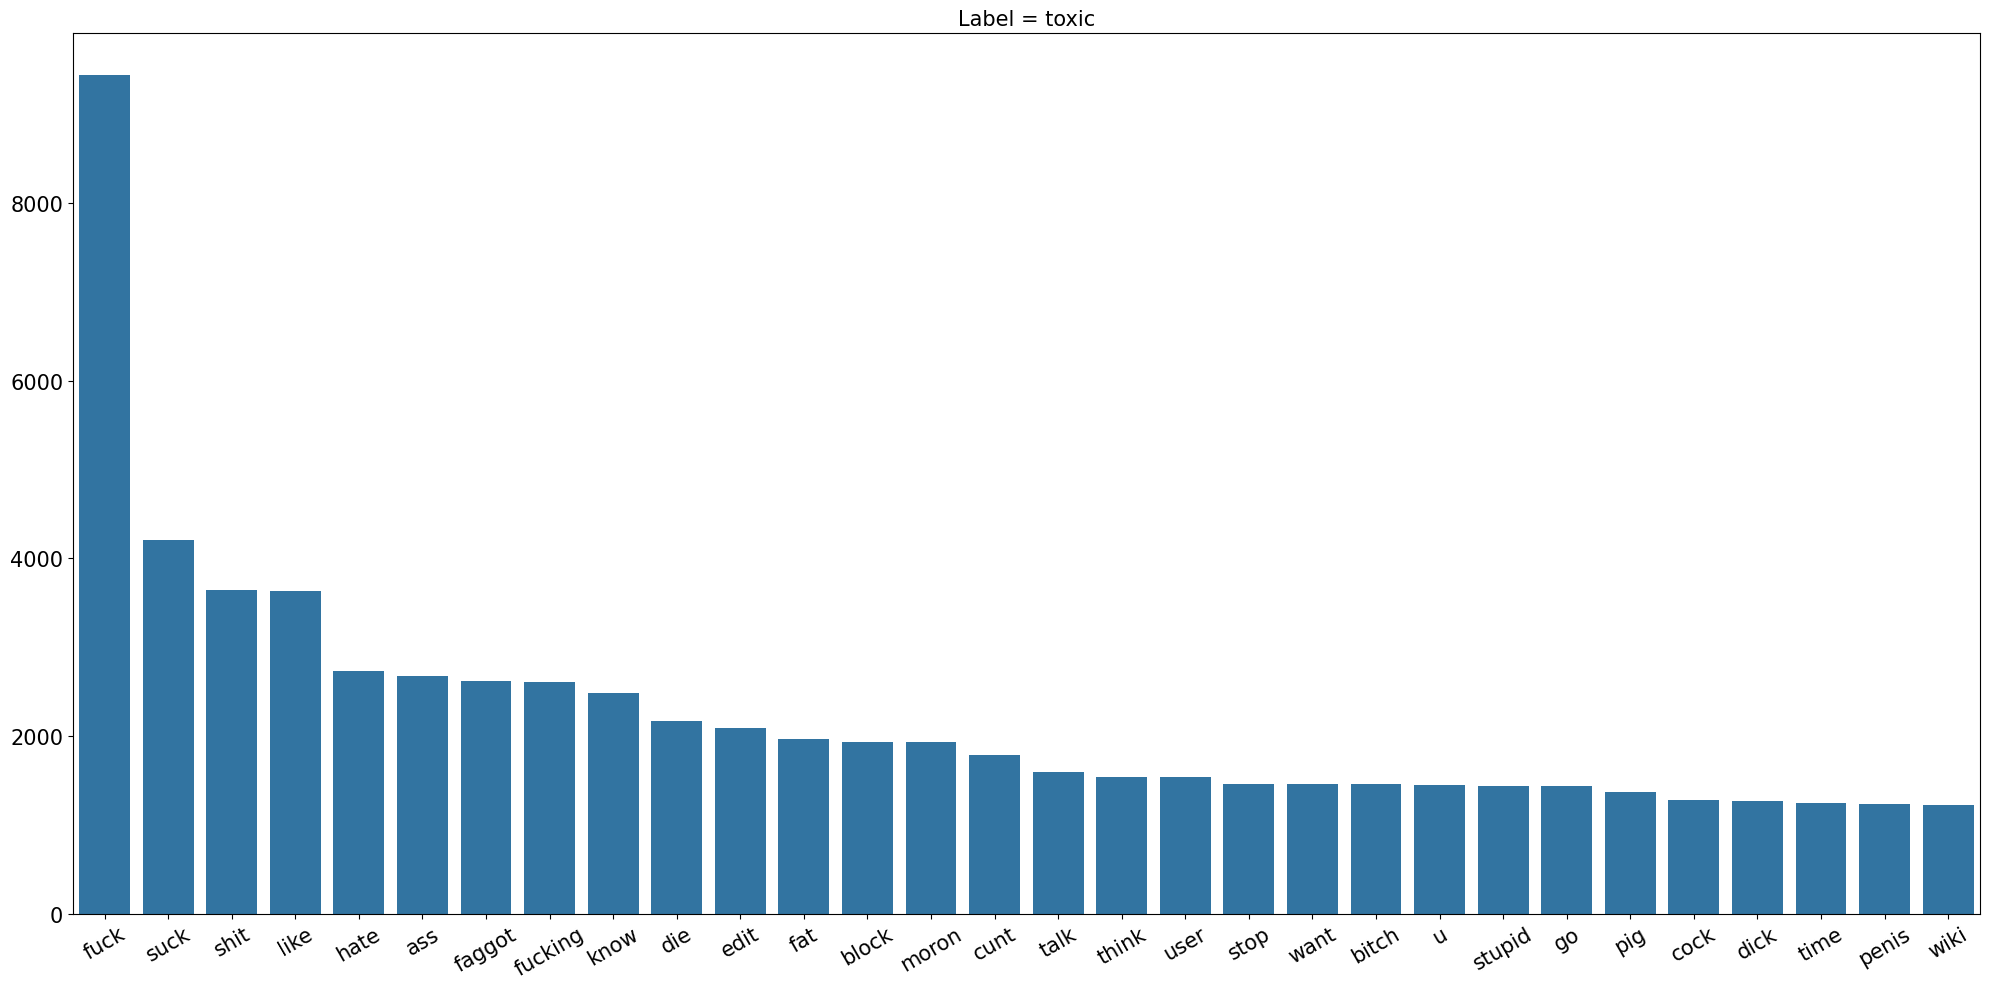

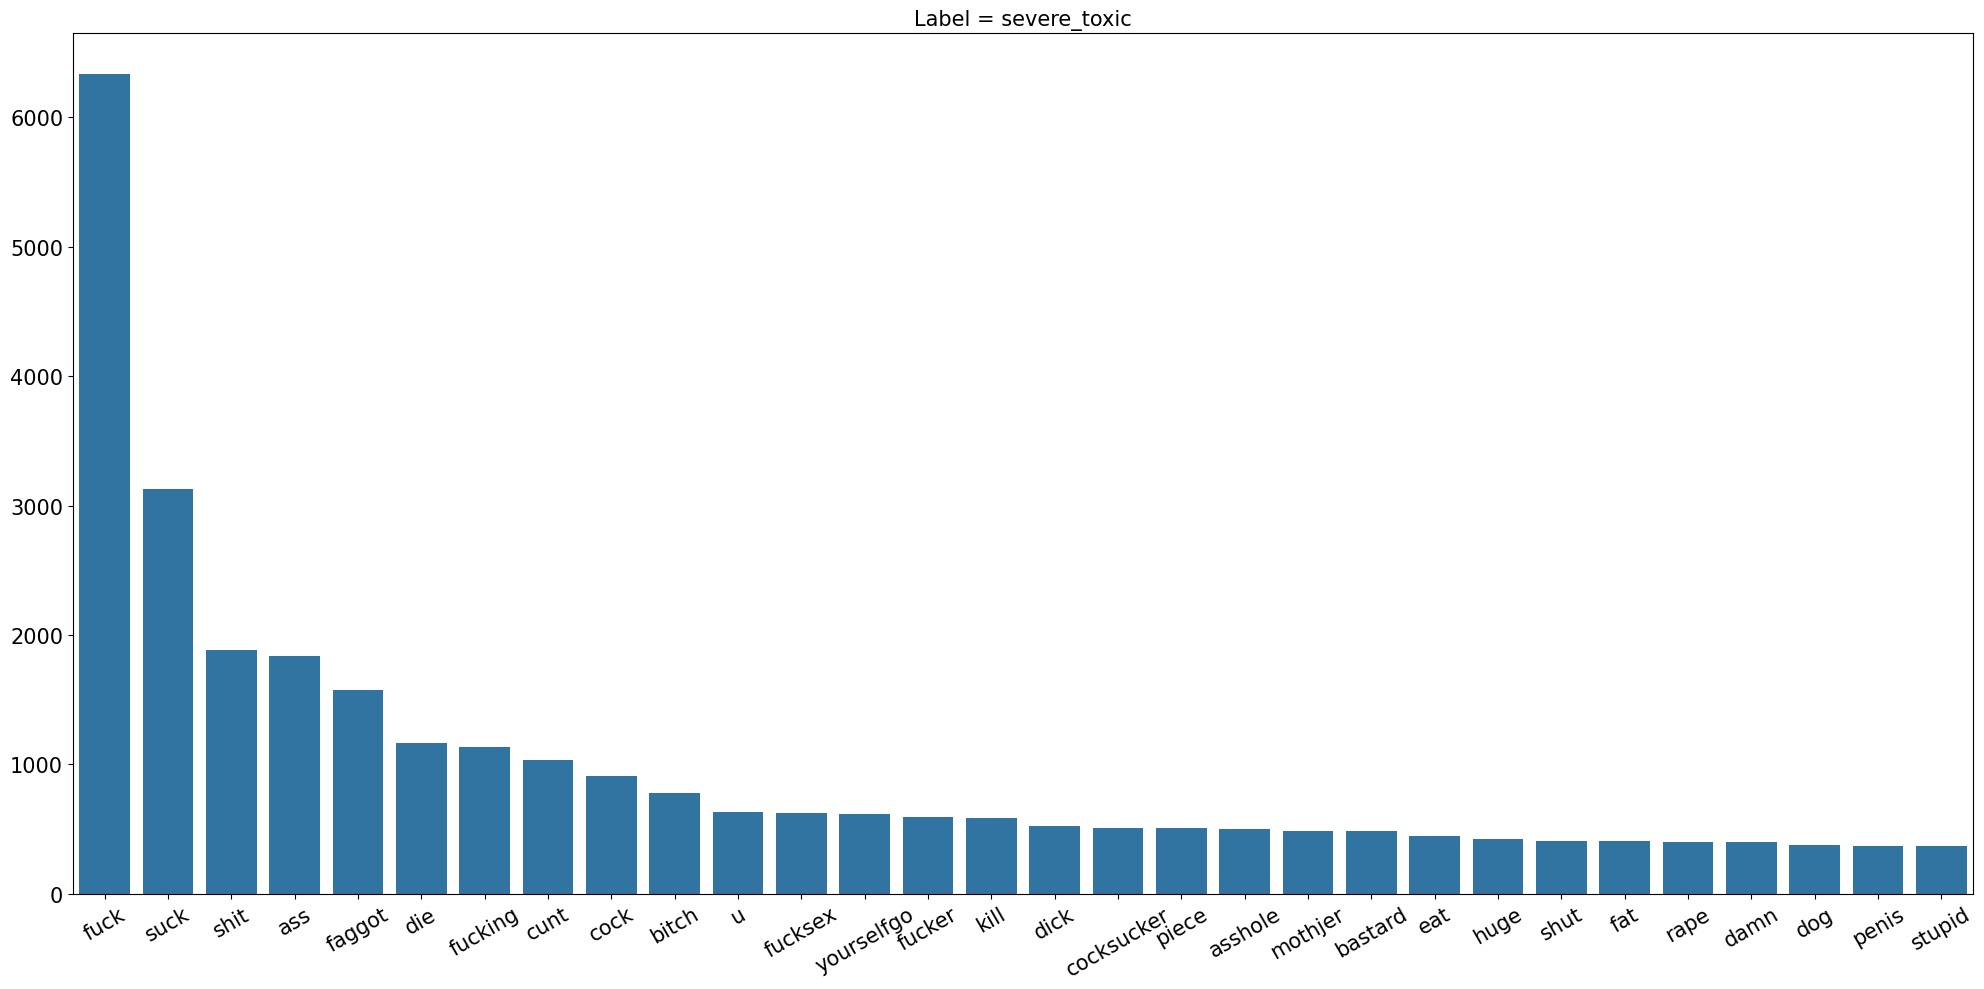

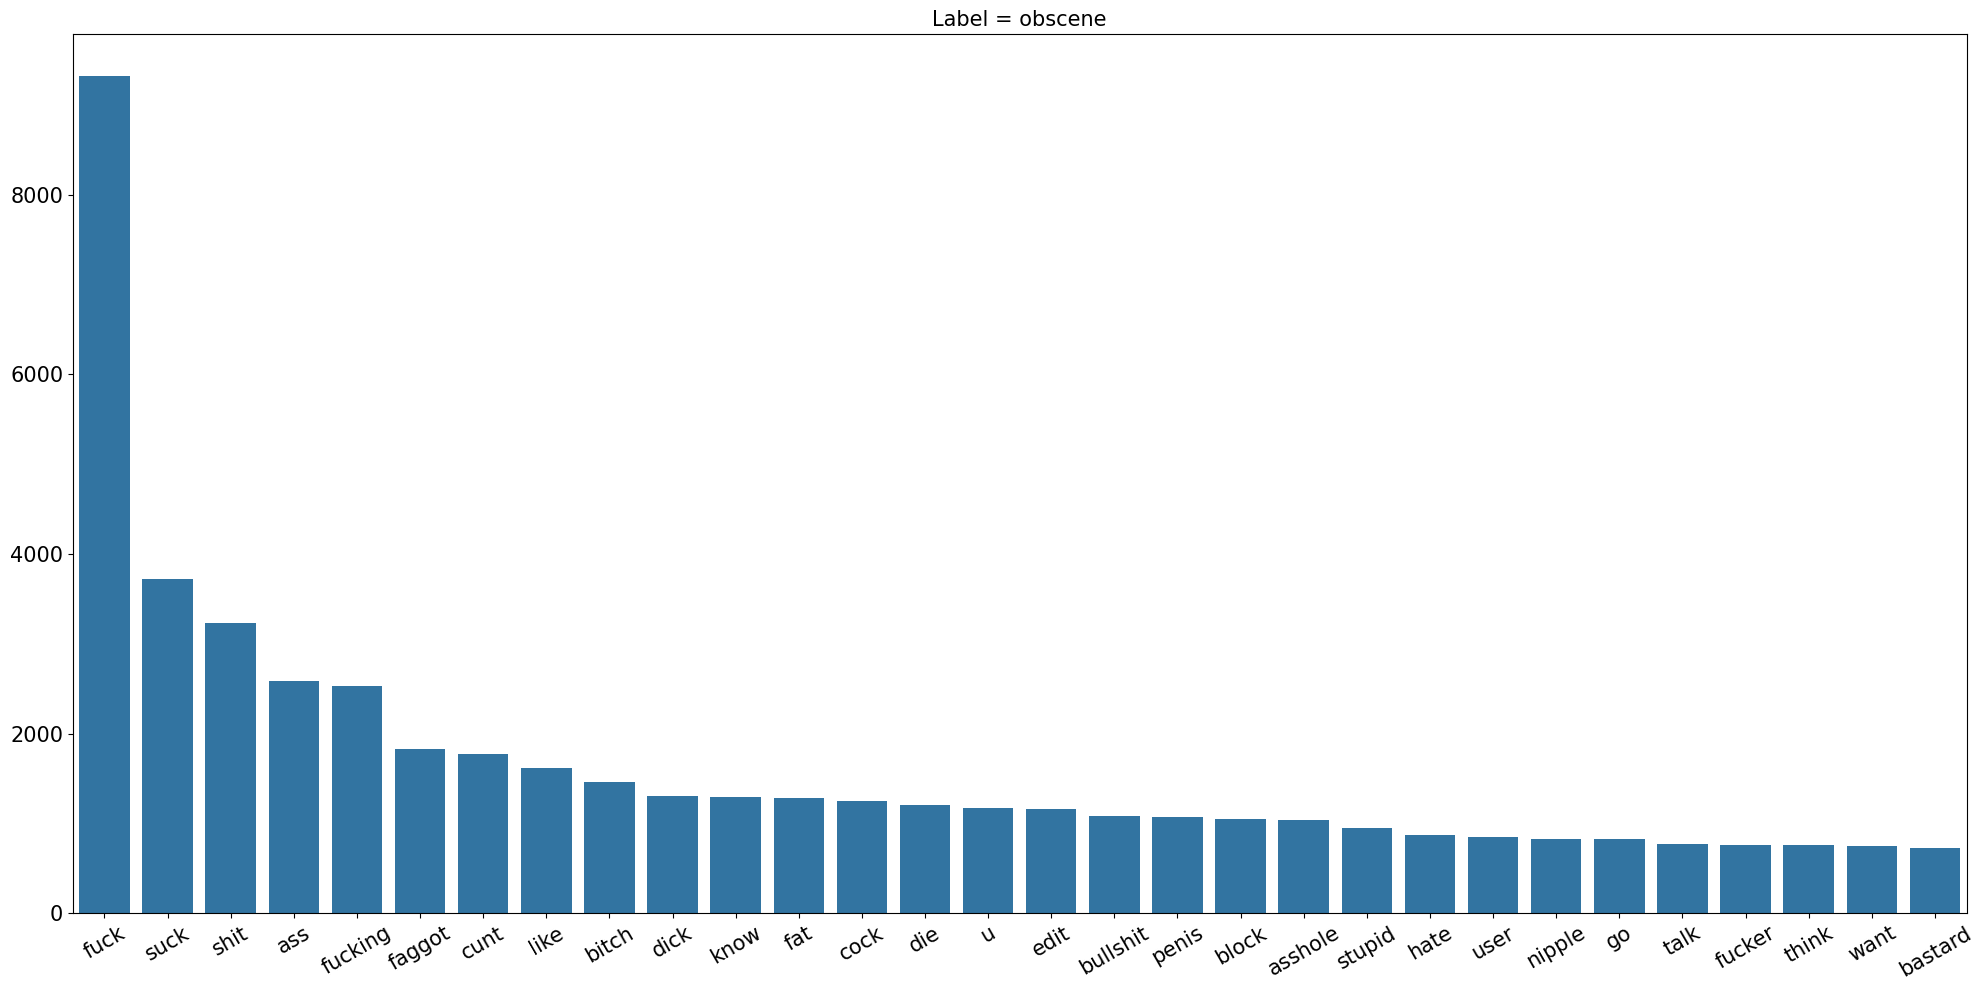

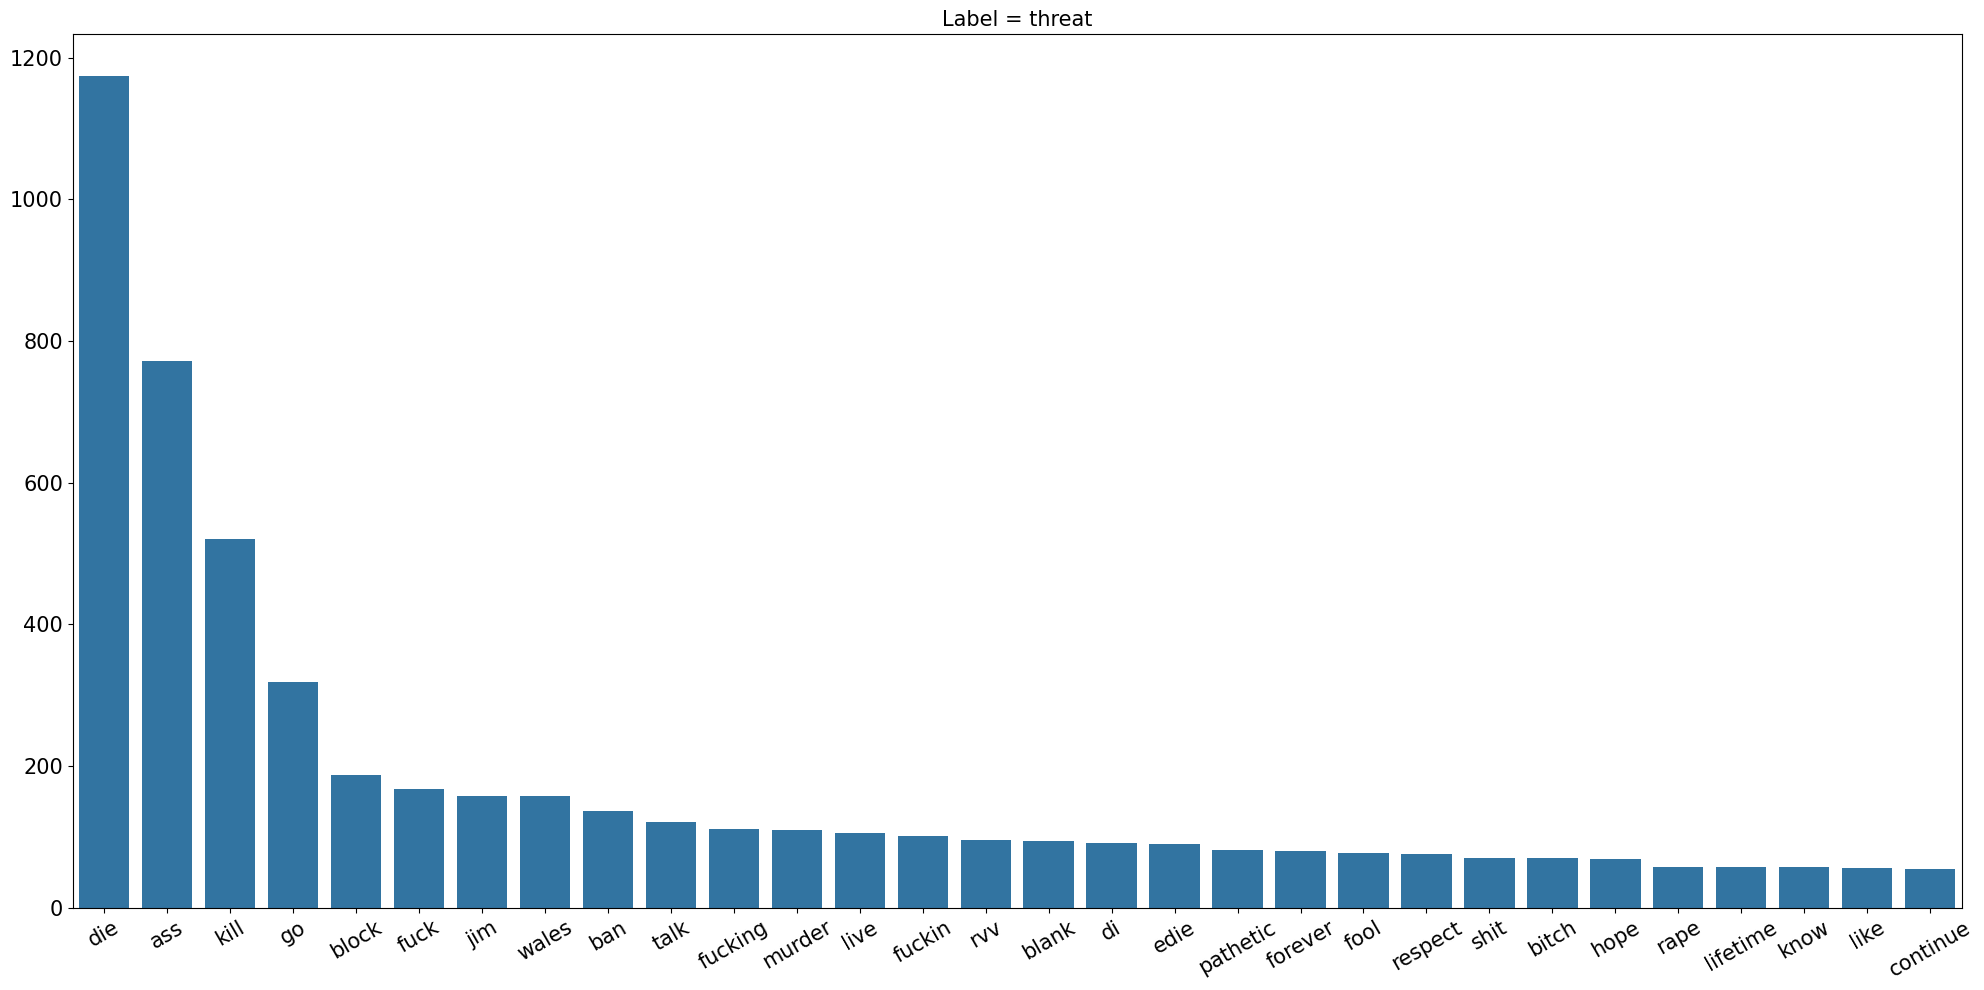

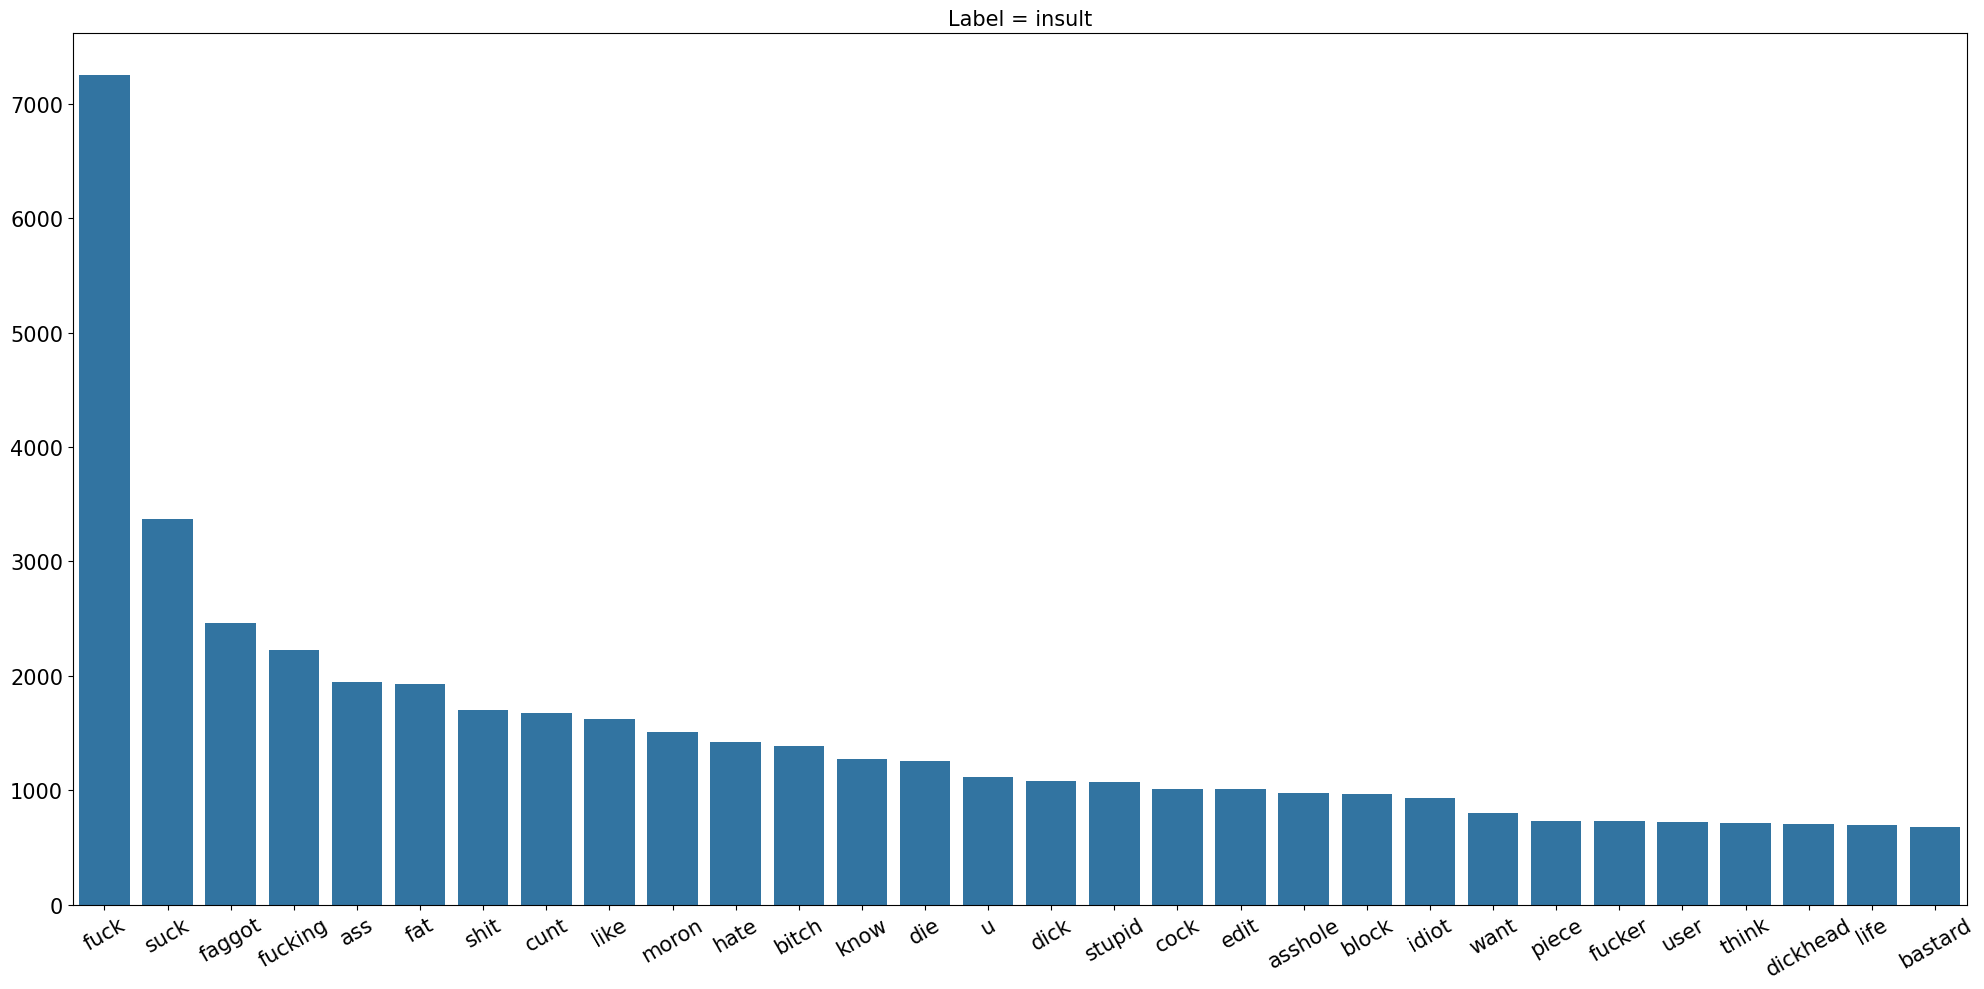

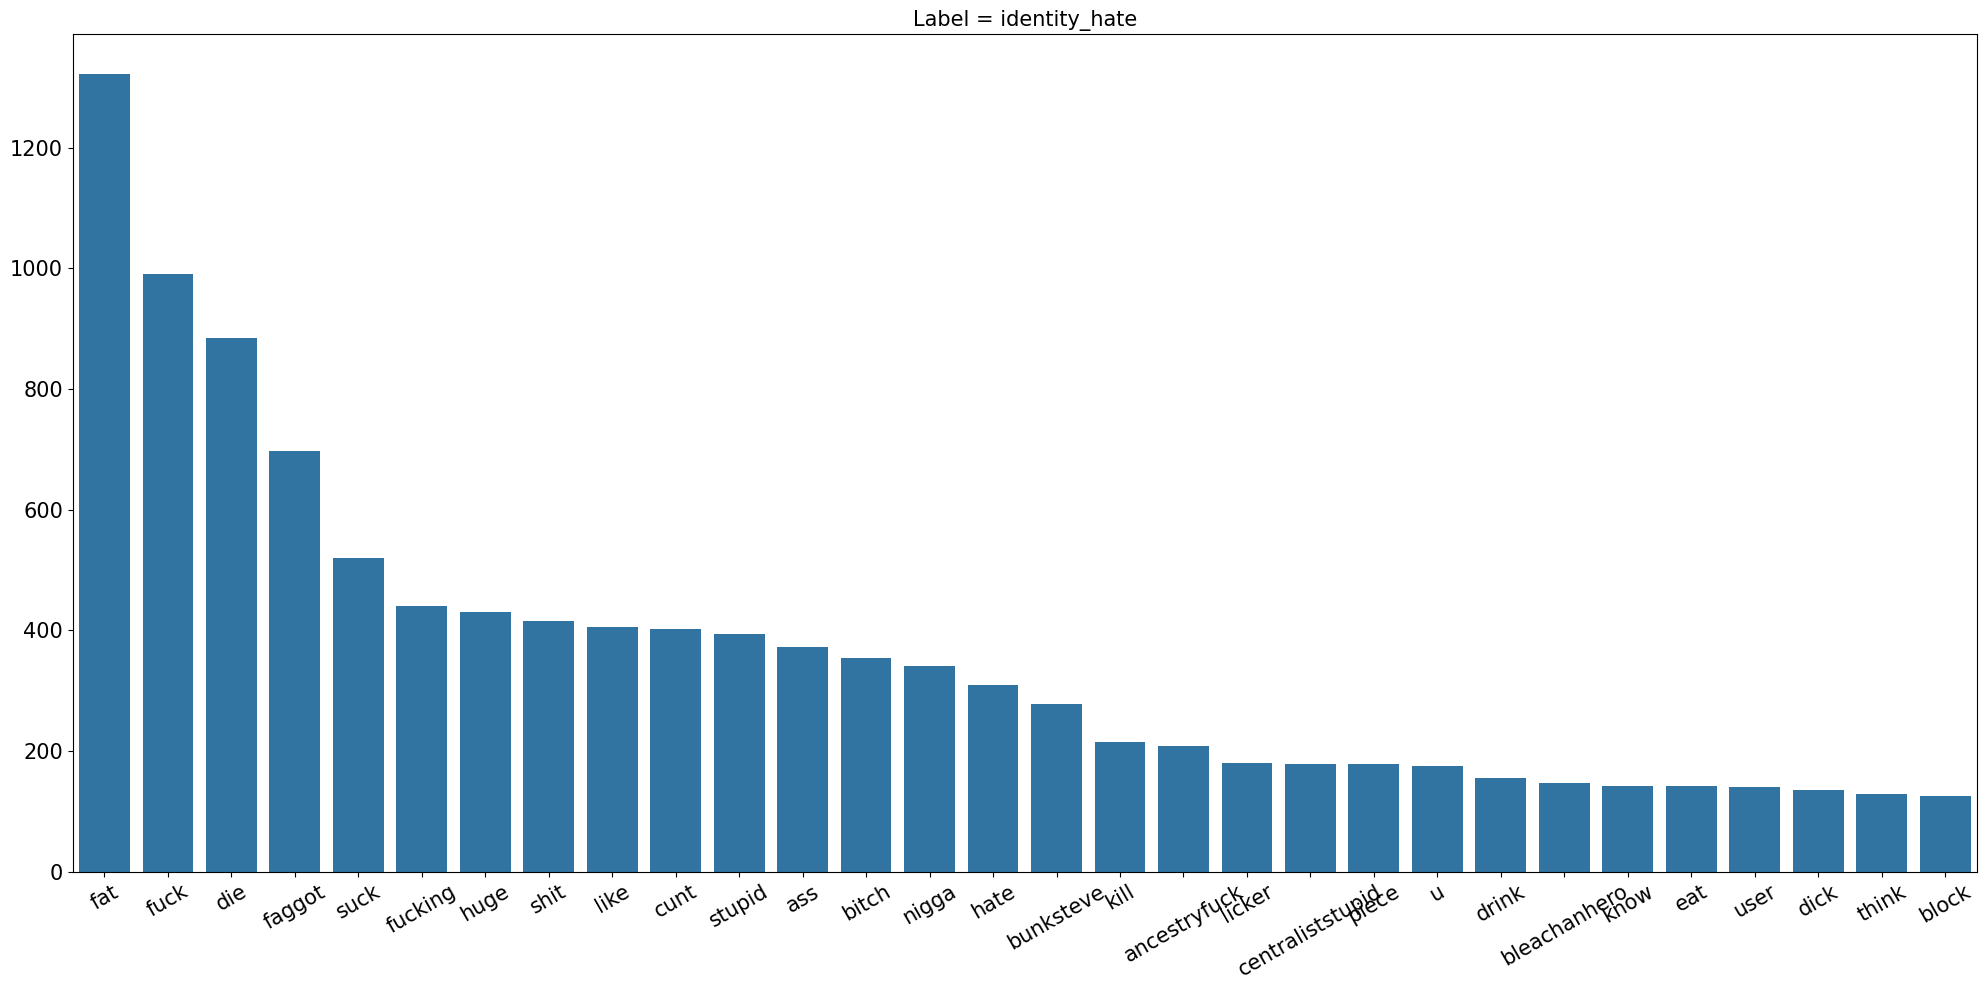

In [17]:
# Varify the reprocessing effect by checking the most common words for each class
target_classes = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

for label in target_classes:
    word_list = list(masked_train_df.loc[masked_train_df[label]==1, 'lemmas'].explode())
    most_common = collections.Counter(word_list).most_common(30)
    words = [w for w,_ in most_common]
    counts = [c for _,c in most_common]
    plt.figure(figsize=(20, 10))
    ax = sns.barplot(x=words, y=counts)
    ax.set_title(f'Label = {label}', fontsize=15)
    ax.tick_params(labelsize=15)
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
    plt.tight_layout() 
    plt.show()

In [18]:
masked_train_df.to_csv('ready_train.csv', index=False)